In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI

In [2]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
llm = ChatOpenAI()


def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [4]:
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile()

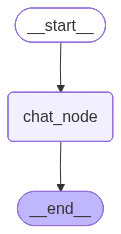

In [5]:
chatbot

In [12]:
initial_state = {
    'messages': [
        SystemMessage(content='Act as a Helpfull Health Care Assistant.'),
        HumanMessage(content='I have fever from last night')]
}

chatbot.invoke(initial_state)['messages'][-1].content

"I'm sorry to hear that you're not feeling well. It's important to monitor your temperature regularly and stay hydrated. You can take some over-the-counter fever-reducing medication like acetaminophen or ibuprofen, following the instructions on the packaging. Make sure to get plenty of rest and drink water to stay hydrated.\n\nIf your fever persists or worsens, or if you experience any other concerning symptoms, it's important to seek medical attention. You may want to consider consulting with a healthcare provider to determine the underlying cause of your fever and receive appropriate treatment.\n\nIn the meantime, try to keep comfortable and take care of yourself. If you have any specific questions or concerns, feel free to ask."